In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from string import punctuation
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_excel('Womens Clothing Reviews Data.xlsx')

In [4]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19662 entries, 2 to 23485
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product ID      19662 non-null  int64 
 1   Category        19662 non-null  object
 2   Subcategory1    19662 non-null  object
 3   SubCategory2    19662 non-null  object
 4   Location        19662 non-null  object
 5   Channel         19662 non-null  object
 6   Customer Age    19662 non-null  int64 
 7   Review Title    19662 non-null  object
 8   Review Text     19662 non-null  object
 9   Rating          19662 non-null  int64 
 10  Recommend Flag  19662 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 1.8+ MB


In [5]:
## Preprocessing data
import re
def pre_process_text(x):
    x = x.strip()
    x = x.lower()
    x = re.sub(r' +', ' ', x)
    x = re.sub(r"[-()\"#/@;:{}`+=~|._!?,'0-9]", "", x)
    return(x)

In [6]:
data['Review Text'] = data['Review Text'].apply(pre_process_text)

In [7]:
data['Review Text'].shape[0]

19662

In [8]:
data.head()

Product ID        Category Subcategory1 SubCategory2   Location Channel  \
2        1077         General      Dresses      Dresses    Gurgaon  Mobile   
3        1049  General Petite      Bottoms        Pants    Chennai     Web   
4         847         General         Tops      Blouses  Bangalore     Web   
5        1080         General      Dresses      Dresses    Gurgaon     Web   
6         858  General Petite         Tops        Knits    Gurgaon  Mobile   

   Customer Age             Review Title  \
2            60  Some major design flaws   
3            50         My favorite buy!   
4            47         Flattering shirt   
5            49  Not for the very petite   
6            39     Cagrcoal shimmer fun   

                                         Review Text  Rating  Recommend Flag  
2  i had such high hopes for this dress and reall...       3               0  
3  i love love love this jumpsuit its fun flirty ...       5               1  
4  this shirt is very flattering to all due to th...       5               1  
5  i love tracy reese dresses but this one is not...       2               0  
6  i aded this in my basket at hte last mintue to...       5               1

In [9]:
## defining sentiment
from textblob import TextBlob 
def sentiment(x):
    analysis = TextBlob(x) 
    return analysis.polarity

In [10]:
data['polarity'] = data['Review Text'].apply(sentiment)

In [11]:
data.head()

Product ID        Category Subcategory1 SubCategory2   Location Channel  \
2        1077         General      Dresses      Dresses    Gurgaon  Mobile   
3        1049  General Petite      Bottoms        Pants    Chennai     Web   
4         847         General         Tops      Blouses  Bangalore     Web   
5        1080         General      Dresses      Dresses    Gurgaon     Web   
6         858  General Petite         Tops        Knits    Gurgaon  Mobile   

   Customer Age             Review Title  \
2            60  Some major design flaws   
3            50         My favorite buy!   
4            47         Flattering shirt   
5            49  Not for the very petite   
6            39     Cagrcoal shimmer fun   

                                         Review Text  Rating  Recommend Flag  \
2  i had such high hopes for this dress and reall...       3               0   
3  i love love love this jumpsuit its fun flirty ...       5               1   
4  this shirt is very flattering to all due to th...       5               1   
5  i love tracy reese dresses but this one is not...       2               0   
6  i aded this in my basket at hte last mintue to...       5               1   

   polarity  
2  0.076392  
3  0.500000  
4  0.393750  
5  0.178750  
6  0.060500

In [12]:
data['Sentiment'] = np.where(data.polarity>0.05, 'Positive', np.where(data.polarity<-0.05, 'Negative', 'Nuetral'))

In [13]:
data.head()

Product ID        Category Subcategory1 SubCategory2   Location Channel  \
2        1077         General      Dresses      Dresses    Gurgaon  Mobile   
3        1049  General Petite      Bottoms        Pants    Chennai     Web   
4         847         General         Tops      Blouses  Bangalore     Web   
5        1080         General      Dresses      Dresses    Gurgaon     Web   
6         858  General Petite         Tops        Knits    Gurgaon  Mobile   

   Customer Age             Review Title  \
2            60  Some major design flaws   
3            50         My favorite buy!   
4            47         Flattering shirt   
5            49  Not for the very petite   
6            39     Cagrcoal shimmer fun   

                                         Review Text  Rating  Recommend Flag  \
2  i had such high hopes for this dress and reall...       3               0   
3  i love love love this jumpsuit its fun flirty ...       5               1   
4  this shirt is very flattering to all due to th...       5               1   
5  i love tracy reese dresses but this one is not...       2               0   
6  i aded this in my basket at hte last mintue to...       5               1   

   polarity Sentiment  
2  0.076392  Positive  
3  0.500000  Positive  
4  0.393750  Positive  
5  0.178750  Positive  
6  0.060500  Positive

### Wordcloud for positive reviews

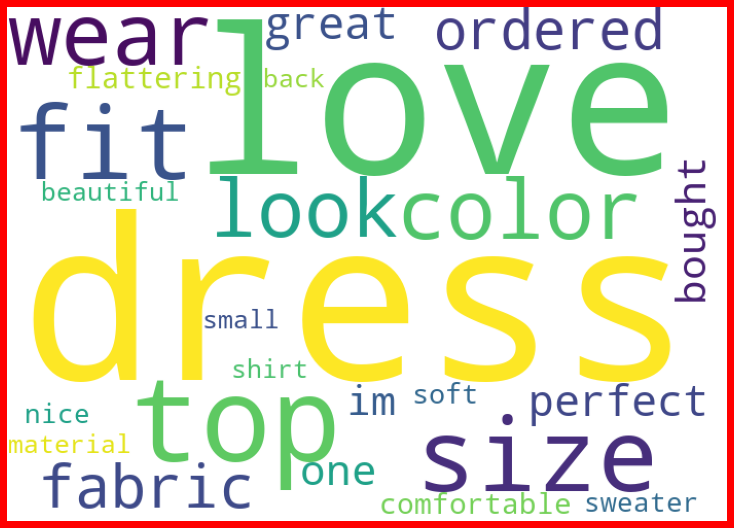

In [14]:
from wordcloud import WordCloud,STOPWORDS
positive = data[data['Sentiment']=='Positive']
positive_cloud = WordCloud(width=700,height=500,background_color = 'white',max_words=25).generate(' '.join(positive['Review Text']))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(positive_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### Wordcloud for Neutral reviews

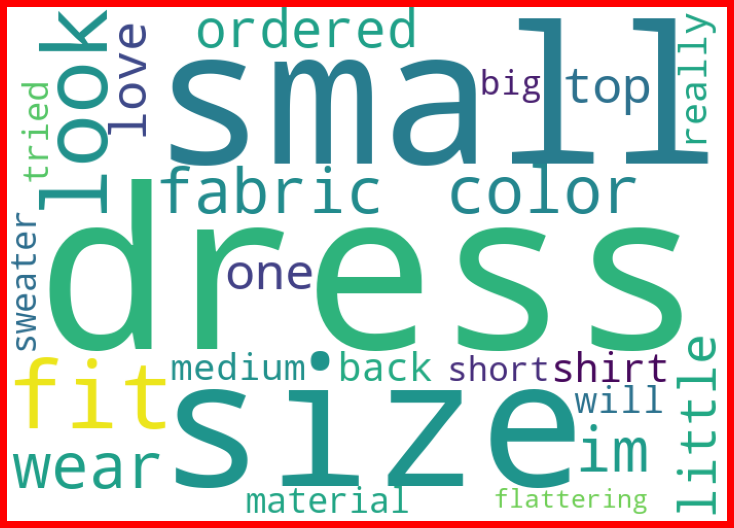

In [15]:
neutral = data[data['Sentiment']=='Nuetral']
neutral_cloud = WordCloud(width=700,height=500,background_color = 'white',max_words=25).generate(' '.join(neutral['Review Text']))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(neutral_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### Wordcloud for Negative reviews

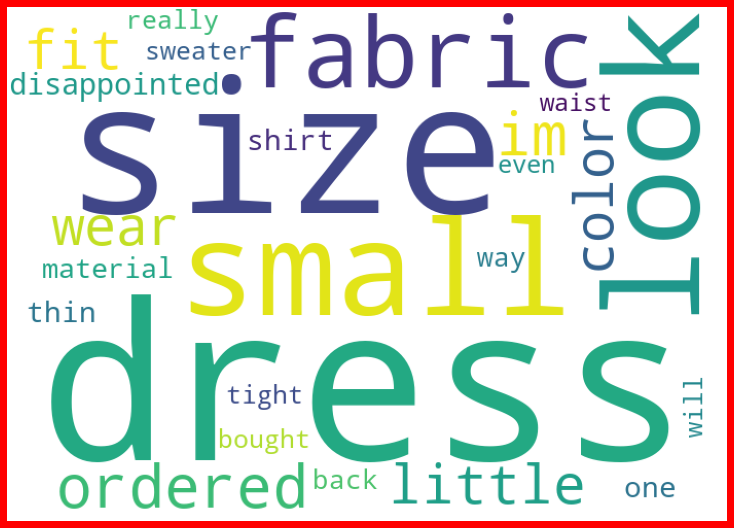

In [16]:
negative = data[data['Sentiment']=='Negative']
negative_cloud = WordCloud(width=700,height=500,background_color = 'white',max_words=25).generate(' '.join(negative['Review Text']))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(negative_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [17]:
pl = data.Sentiment.value_counts()

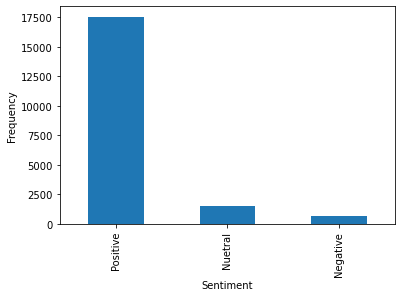

In [18]:
pl.plot(kind='bar')
plt.ylabel('Frequency')
plt.xlabel('Sentiment')
plt.show()

In [19]:
## Sentiments according to rating given.
pd.crosstab(data.Sentiment, data.Rating)

Rating       1    2     3     4      5
Sentiment                             
Negative   140  150   155   100     91
Nuetral    150  255   333   330    415
Positive   401  955  1976  3859  10352

## Dividing data into train and test

In [20]:
x = data['Review Text']
y = data['Recommend Flag']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14746,)
(4916,)
(14746,)
(4916,)


### Vectorization 

In [22]:
sw = list(STOPWORDS)
sw = sw+['aa','adn','ag','bc','boho','cami','cd','dd','ddd','def','dindt']

In [23]:
#Train
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vect = TfidfVectorizer(analyzer='word', preprocessor=pre_process_text, ngram_range=(1,2),max_df = 1.0, min_df=10, max_features=3000, stop_words=sw)

In [24]:
vect = vect.fit(X_train)

In [25]:
X_train_dtm = vect.transform(X_train)
X_train_dtm

<14746x3000 sparse matrix of type '<class 'numpy.float64'>'
	with 420181 stored elements in Compressed Sparse Row format>

In [26]:
X_test_dtm = vect.transform(X_test)
X_test_dtm 

<4916x3000 sparse matrix of type '<class 'numpy.float64'>'
	with 139651 stored elements in Compressed Sparse Row format>

In [27]:
vect.get_feature_names()

['able',
 'able wear',
 'absolutely',
 'absolutely beautiful',
 'absolutely gorgeous',
 'absolutely love',
 'accentuate',
 'accentuates',
 'accessories',
 'accommodate',
 'accurate',
 'across',
 'across bust',
 'across chest',
 'actual',
 'actually',
 'add',
 'added',
 'adding',
 'addition',
 'addition wardrobe',
 'additional',
 'adds',
 'adjust',
 'adjustable',
 'adorable',
 'adore',
 'advice',
 'afraid',
 'age',
 'ago',
 'agree',
 'agree reviewer',
 'agree reviewers',
 'ahead',
 'air',
 'airy',
 'alas',
 'aline',
 'allow',
 'allows',
 'almost',
 'alone',
 'along',
 'already',
 'already worn',
 'altered',
 'alternative',
 'although',
 'always',
 'always wear',
 'amazing',
 'amazingly',
 'amount',
 'amount stretch',
 'ample',
 'ankle',
 'ankle length',
 'ankles',
 'annoying',
 'another',
 'another color',
 'another one',
 'another pair',
 'another reviewer',
 'anymore',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'apart',
 'appeal',
 'appear',
 'appearance',
 'appears',
 'apprecia

In [28]:
X_train_dtm = pd.DataFrame(X_train_dtm.todense(), columns = vect.get_feature_names())

In [29]:
X_train_dtm

able  able wear  absolutely  absolutely beautiful  absolutely gorgeous  \
0       0.0        0.0         0.0                   0.0                  0.0   
1       0.0        0.0         0.0                   0.0                  0.0   
2       0.0        0.0         0.0                   0.0                  0.0   
3       0.0        0.0         0.0                   0.0                  0.0   
4       0.0        0.0         0.0                   0.0                  0.0   
...     ...        ...         ...                   ...                  ...   
14741   0.0        0.0         0.0                   0.0                  0.0   
14742   0.0        0.0         0.0                   0.0                  0.0   
14743   0.0        0.0         0.0                   0.0                  0.0   
14744   0.0        0.0         0.0                   0.0                  0.0   
14745   0.0        0.0         0.0                   0.0                  0.0   

       absolutely love  accentuate  accentuates  accessories  accommodate  \
0                  0.0         0.0          0.0          0.0          0.0   
1                  0.0         0.0          0.0          0.0          0.0   
2                  0.0         0.0          0.0          0.0          0.0   
3                  0.0         0.0          0.0          0.0          0.0   
4                  0.0         0.0          0.0          0.0          0.0   
...                ...         ...          ...          ...          ...   
14741              0.0         0.0          0.0          0.0          0.0   
14742              0.0         0.0          0.0          0.0          0.0   
14743              0.0         0.0          0.0          0.0          0.0   
14744              0.0         0.0          0.0          0.0          0.0   
14745              0.0         0.0          0.0          0.0          0.0   

       ...  yoga  youd  youll  young  younger  youre  youre looking  zip  \
0      ...   0.0   0.0    0.0    0.0      0.0    0.0            0.0  0.0   
1      ...   0.0   0.0    0.0    0.0      0.0    0.0            0.0  0.0   
2      ...   0.0   0.0    0.0    0.0      0.0    0.0            0.0  0.0   
3      ...   0.0   0.0    0.0    0.0      0.0    0.0            0.0  0.0   
4      ...   0.0   0.0    0.0    0.0      0.0    0.0            0.0  0.0   
...    ...   ...   ...    ...    ...      ...    ...            ...  ...   
14741  ...   0.0   0.0    0.0    0.0      0.0    0.0            0.0  0.0   
14742  ...   0.0   0.0    0.0    0.0      0.0    0.0            0.0  0.0   
14743  ...   0.0   0.0    0.0    0.0      0.0    0.0            0.0  0.0   
14744  ...   0.0   0.0    0.0    0.0      0.0    0.0            0.0  0.0   
14745  ...   0.0   0.0    0.0    0.0      0.0    0.0            0.0  0.0   

       zipped  zipper  
0         0.0     0.0  
1         0.0     0.0  
2         0.0     0.0  
3         0.0     0.0  
4         0.0     0.0  
...       ...     ...  
14741     0.0     0.0  
14742     0.0     0.0  
14743     0.0     0.0  
14744     0.0     0.0  
14745     0.0     0.0  

[14746 rows x 3000 columns]

In [30]:
X_test_dtm = pd.DataFrame(X_test_dtm.todense(), columns = vect.get_feature_names())

In [31]:
X_test_dtm

able  able wear  absolutely  absolutely beautiful  absolutely gorgeous  \
0      0.0        0.0         0.0                   0.0                  0.0   
1      0.0        0.0         0.0                   0.0                  0.0   
2      0.0        0.0         0.0                   0.0                  0.0   
3      0.0        0.0         0.0                   0.0                  0.0   
4      0.0        0.0         0.0                   0.0                  0.0   
...    ...        ...         ...                   ...                  ...   
4911   0.0        0.0         0.0                   0.0                  0.0   
4912   0.0        0.0         0.0                   0.0                  0.0   
4913   0.0        0.0         0.0                   0.0                  0.0   
4914   0.0        0.0         0.0                   0.0                  0.0   
4915   0.0        0.0         0.0                   0.0                  0.0   

      absolutely love  accentuate  accentuates  accessories  accommodate  ...  \
0                 0.0         0.0          0.0          0.0          0.0  ...   
1                 0.0         0.0          0.0          0.0          0.0  ...   
2                 0.0         0.0          0.0          0.0          0.0  ...   
3                 0.0         0.0          0.0          0.0          0.0  ...   
4                 0.0         0.0          0.0          0.0          0.0  ...   
...               ...         ...          ...          ...          ...  ...   
4911              0.0         0.0          0.0          0.0          0.0  ...   
4912              0.0         0.0          0.0          0.0          0.0  ...   
4913              0.0         0.0          0.0          0.0          0.0  ...   
4914              0.0         0.0          0.0          0.0          0.0  ...   
4915              0.0         0.0          0.0          0.0          0.0  ...   

      yoga  youd  youll  young  younger  youre  youre looking  zip  zipped  \
0      0.0   0.0    0.0    0.0      0.0    0.0            0.0  0.0     0.0   
1      0.0   0.0    0.0    0.0      0.0    0.0            0.0  0.0     0.0   
2      0.0   0.0    0.0    0.0      0.0    0.0            0.0  0.0     0.0   
3      0.0   0.0    0.0    0.0      0.0    0.0            0.0  0.0     0.0   
4      0.0   0.0    0.0    0.0      0.0    0.0            0.0  0.0     0.0   
...    ...   ...    ...    ...      ...    ...            ...  ...     ...   
4911   0.0   0.0    0.0    0.0      0.0    0.0            0.0  0.0     0.0   
4912   0.0   0.0    0.0    0.0      0.0    0.0            0.0  0.0     0.0   
4913   0.0   0.0    0.0    0.0      0.0    0.0            0.0  0.0     0.0   
4914   0.0   0.0    0.0    0.0      0.0    0.0            0.0  0.0     0.0   
4915   0.0   0.0    0.0    0.0      0.0    0.0            0.0  0.0     0.0   

        zipper  
0     0.000000  
1     0.000000  
2     0.163476  
3     0.000000  
4     0.000000  
...        ...  
4911  0.000000  
4912  0.000000  
4913  0.000000  
4914  0.000000  
4915  0.000000  

[4916 rows x 3000 columns]

In [32]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Naive Bayes 

In [33]:
# train a Naive Bayes model using X_train_dtm
from sklearn.naive_bayes import MultinomialNB, GaussianNB
nb = MultinomialNB()
#nb = GaussianNB()
nb.fit(X_train_dtm, y_train)

MultinomialNB()

In [34]:
# make class predictions for X_test_dtm
y_pred_class_train = nb.predict(X_train_dtm)
y_pred_class = nb.predict(X_test_dtm)

In [35]:
# calculate accuracy of class predictions
from sklearn import metrics
print('Test Accuracy:', metrics.accuracy_score(y_test, y_pred_class))

Test Accuracy: 0.861879576891782


In [36]:
print('Train Accuracy:', metrics.accuracy_score(y_train, y_pred_class_train))

Train Accuracy: 0.8794249287942493


In [54]:
print(metrics.classification_report(y_train, y_pred_class_train))
print(metrics.classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.87      0.39      0.54      2667
           1       0.88      0.99      0.93     12079

    accuracy                           0.88     14746
   macro avg       0.87      0.69      0.74     14746
weighted avg       0.88      0.88      0.86     14746

              precision    recall  f1-score   support

           0       0.81      0.33      0.47       908
           1       0.87      0.98      0.92      4008

    accuracy                           0.86      4916
   macro avg       0.84      0.66      0.70      4916
weighted avg       0.86      0.86      0.84      4916



## KNN Classifier 

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [38]:
param_grid = {'n_neighbors' : [3,5,7,9,11], 'weights': ['uniform', 'distance']}

In [39]:
model = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='f1_weighted')
model.fit(X_train_dtm, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='f1_weighted')

In [40]:
model.best_params_

{'n_neighbors': 11, 'weights': 'distance'}

In [56]:
best_model = KNeighborsClassifier(n_neighbors=11, weights='distance')
best_model.fit(X_train_dtm, y_train)

KNeighborsClassifier(n_neighbors=11, weights='distance')

In [57]:
##Accuracy for train data
train_accuracy = metrics.accuracy_score(y_train, pd.DataFrame(best_model.predict(X_train_dtm)))
train_accuracy

1.0

In [58]:
##Accuracy for test data
test_accuracy = metrics.accuracy_score(y_test,  pd.DataFrame(best_model.predict(X_test_dtm)))
test_accuracy

0.8502847843775427

In [61]:
print(metrics.classification_report(y_train, pd.DataFrame(best_model.predict(X_train_dtm))))
print(metrics.classification_report(y_test, pd.DataFrame(best_model.predict(X_test_dtm))))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2667
           1       1.00      1.00      1.00     12079

    accuracy                           1.00     14746
   macro avg       1.00      1.00      1.00     14746
weighted avg       1.00      1.00      1.00     14746

              precision    recall  f1-score   support

           0       0.73      0.31      0.43       908
           1       0.86      0.97      0.91      4008

    accuracy                           0.85      4916
   macro avg       0.79      0.64      0.67      4916
weighted avg       0.84      0.85      0.82      4916



## Decision Tree 

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
param_grid = {'max_depth': [3,4,5,6,7,8,9],
              'max_leaf_nodes': [5,6,7,8,9,10,11]
}
model = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='f1_weighted')
model.fit(X_train_dtm, y_train) 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'max_leaf_nodes': [5, 6, 7, 8, 9, 10, 11]},
             scoring='f1_weighted')

In [48]:
model.best_params_

{'max_depth': 9, 'max_leaf_nodes': 11}

In [62]:
best_model = DecisionTreeClassifier(max_depth=9,max_leaf_nodes=11)
best_model.fit(X_train_dtm,y_train)

DecisionTreeClassifier(max_depth=9, max_leaf_nodes=11)

In [63]:
##Accuracy for train data
train_accuracy = metrics.accuracy_score(y_train, pd.DataFrame(best_model.predict(X_train_dtm)))
train_accuracy

0.8522989285229893

In [64]:
##Accuracy for test data
test_accuracy = metrics.accuracy_score(y_test, pd.DataFrame(best_model.predict(X_test_dtm)))
test_accuracy

0.8395036615134256

In [65]:
print(metrics.classification_report(y_train, pd.DataFrame(best_model.predict(X_train_dtm))))
print(metrics.classification_report(y_test, pd.DataFrame(best_model.predict(X_test_dtm))))

              precision    recall  f1-score   support

           0       0.68      0.34      0.46      2667
           1       0.87      0.96      0.91     12079

    accuracy                           0.85     14746
   macro avg       0.78      0.65      0.69     14746
weighted avg       0.84      0.85      0.83     14746

              precision    recall  f1-score   support

           0       0.63      0.31      0.42       908
           1       0.86      0.96      0.91      4008

    accuracy                           0.84      4916
   macro avg       0.75      0.63      0.66      4916
weighted avg       0.82      0.84      0.82      4916



# Topic mining 

In [67]:
topic = data['Review Text'].reset_index(drop=True)

In [68]:
topic = list(topic)

In [69]:
topic

['i had such high hopes for this dress and really wanted it to work for me i initially ordered the petite small my usual size but i found this to be outrageously small so small in fact that i could not zip it up i reordered it in petite medium which was just ok overall the top half was comfortable and fit nicely but the bottom half had a very tight under layer and several somewhat cheap net over layers imo a major design flaw was the net over layer sewn directly into the zipper  it c',
 'i love love love this jumpsuit its fun flirty and fabulous every time i wear it i get nothing but great compliments',
 'this shirt is very flattering to all due to the adjustable front tie it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan love this shirt',
 'i love tracy reese dresses but this one is not for the very petite i am just under  feet tall and usually wear a p in this brand this dress was very pretty out of the package but its a lot of dre

In [70]:
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer

In [71]:
import nltk

In [72]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [73]:
#Preprocessing
import string
stop = sw
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(doc).split() for doc in topic] 

In [74]:
doc_clean

[['high',
  'hope',
  'dress',
  'really',
  'wanted',
  'work',
  'initially',
  'ordered',
  'petite',
  'small',
  'usual',
  'size',
  'found',
  'outrageously',
  'small',
  'small',
  'fact',
  'zip',
  'reordered',
  'petite',
  'medium',
  'ok',
  'overall',
  'top',
  'half',
  'comfortable',
  'fit',
  'nicely',
  'bottom',
  'half',
  'tight',
  'layer',
  'several',
  'somewhat',
  'cheap',
  'net',
  'layer',
  'imo',
  'major',
  'design',
  'flaw',
  'net',
  'layer',
  'sewn',
  'directly',
  'zipper',
  'c'],
 ['love',
  'love',
  'love',
  'jumpsuit',
  'fun',
  'flirty',
  'fabulous',
  'every',
  'time',
  'wear',
  'nothing',
  'great',
  'compliment'],
 ['shirt',
  'flattering',
  'due',
  'adjustable',
  'front',
  'tie',
  'perfect',
  'length',
  'wear',
  'legging',
  'sleeveless',
  'pair',
  'well',
  'cardigan',
  'love',
  'shirt'],
 ['love',
  'tracy',
  'reese',
  'dress',
  'one',
  'petite',
  'foot',
  'tall',
  'usually',
  'wear',
  'p',
  'brand',


In [75]:
# Importing Gensim
import gensim
from gensim import corpora

# Creating the term dictionary of our courpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(doc_clean)

print(dictionary)

Dictionary(16592 unique tokens: ['bottom', 'c', 'cheap', 'comfortable', 'design']...)


In [76]:
for i in dictionary.values():
    print(i)

bottom
c
cheap
comfortable
design
directly
dress
fact
fit
flaw
found
half
high
hope
imo
initially
layer
major
medium
net
nicely
ok
ordered
outrageously
overall
petite
really
reordered
several
sewn
size
small
somewhat
tight
top
usual
wanted
work
zip
zipper
compliment
every
fabulous
flirty
fun
great
jumpsuit
love
nothing
time
wear
adjustable
cardigan
due
flattering
front
legging
length
pair
perfect
shirt
sleeveless
tie
well
alteration
away
brand
color
embellishment
foot
frame
full
garment
idea
long
lot
narrowing
one
overwhelmed
p
package
pretty
reese
returned
shortening
skirt
stranger
style
take
tall
tracy
usually
aded
baggy
basket
bummer
darkler
decided
ejans
everythiing
everything
gorgeous
hte
jkeep
kept
last
little
look
mathced
matvehd
mintue
msallet
oops
pale
pant
person
pick
prefectly
said
see
store
teh
though
trying
turn
waas
went
x
already
always
big
bit
carbon
charcoal
compaint
doesnt
etc
flare
go
later
ldecide
light
loose
nice
pencil
shimmer
sleeve
smallest
sold
stuff
ton
try
us

In [77]:
doc_clean

[['high',
  'hope',
  'dress',
  'really',
  'wanted',
  'work',
  'initially',
  'ordered',
  'petite',
  'small',
  'usual',
  'size',
  'found',
  'outrageously',
  'small',
  'small',
  'fact',
  'zip',
  'reordered',
  'petite',
  'medium',
  'ok',
  'overall',
  'top',
  'half',
  'comfortable',
  'fit',
  'nicely',
  'bottom',
  'half',
  'tight',
  'layer',
  'several',
  'somewhat',
  'cheap',
  'net',
  'layer',
  'imo',
  'major',
  'design',
  'flaw',
  'net',
  'layer',
  'sewn',
  'directly',
  'zipper',
  'c'],
 ['love',
  'love',
  'love',
  'jumpsuit',
  'fun',
  'flirty',
  'fabulous',
  'every',
  'time',
  'wear',
  'nothing',
  'great',
  'compliment'],
 ['shirt',
  'flattering',
  'due',
  'adjustable',
  'front',
  'tie',
  'perfect',
  'length',
  'wear',
  'legging',
  'sleeveless',
  'pair',
  'well',
  'cardigan',
  'love',
  'shirt'],
 ['love',
  'tracy',
  'reese',
  'dress',
  'one',
  'petite',
  'foot',
  'tall',
  'usually',
  'wear',
  'p',
  'brand',


In [78]:
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
doc_term_matrix

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 2),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 3),
  (17, 1),
  (18, 1),
  (19, 2),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 2),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 3),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1)],
 [(40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 3),
  (48, 1),
  (49, 1),
  (50, 1)],
 [(47, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 2),
  (61, 1),
  (62, 1),
  (63, 1)],
 [(6, 4),
  (25, 1),
  (31, 1),
  (37, 1),
  (47, 2),
  (50, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 

In [79]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

In [80]:
# Running and Training LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=8, id2word = dictionary)

In [81]:
ldamodel

In [82]:
ldamodel.print_topics()

[(0,
  '0.040*"dress" + 0.018*"fit" + 0.014*"size" + 0.014*"top" + 0.013*"look" + 0.011*"fabric" + 0.010*"really" + 0.009*"flattering" + 0.009*"petite" + 0.008*"beautiful"'),
 (1,
  '0.060*"dress" + 0.021*"love" + 0.015*"wear" + 0.014*"look" + 0.013*"fit" + 0.013*"great" + 0.011*"color" + 0.011*"perfect" + 0.009*"comfortable" + 0.008*"size"'),
 (2,
  '0.022*"love" + 0.015*"color" + 0.014*"fit" + 0.012*"great" + 0.011*"look" + 0.010*"price" + 0.009*"top" + 0.009*"one" + 0.009*"im" + 0.009*"shirt"'),
 (3,
  '0.028*"wear" + 0.021*"xd" + 0.015*"shirt" + 0.012*"bra" + 0.012*"will" + 0.012*"blouse" + 0.011*"color" + 0.011*"white" + 0.011*"great" + 0.010*"work"'),
 (4,
  '0.026*"sweater" + 0.016*"soft" + 0.016*"wear" + 0.016*"color" + 0.014*"love" + 0.011*"large" + 0.011*"top" + 0.010*"perfect" + 0.009*"look" + 0.009*"medium"'),
 (5,
  '0.067*"top" + 0.012*"look" + 0.011*"love" + 0.010*"fabric" + 0.010*"color" + 0.010*"one" + 0.010*"back" + 0.007*"wash" + 0.007*"much" + 0.007*"photo"'),
 (6,


In [83]:
# printing the topic associaltions with the documents
count = 0
for i in ldamodel[doc_term_matrix]:
    print("doc : ",count,i)
    count += 1

doc :  0 [(0, 0.34870258), (6, 0.6353233)]
doc :  1 [(1, 0.7372485), (2, 0.2091069)]
doc :  2 [(3, 0.6928188), (7, 0.26296866)]
doc :  3 [(1, 0.61421347), (6, 0.366548)]
doc :  4 [(0, 0.80364317), (7, 0.17650288)]
doc :  5 [(0, 0.043835755), (2, 0.15735279), (4, 0.0435064), (6, 0.46892875), (7, 0.27856198)]
doc :  6 [(1, 0.123836264), (6, 0.32030514), (7, 0.5190397)]
doc :  7 [(1, 0.24459569), (6, 0.73613846)]
doc :  8 [(0, 0.29598665), (5, 0.18296131), (6, 0.5031383)]
doc :  9 [(0, 0.1336076), (2, 0.22988863), (3, 0.13148078), (4, 0.11462214), (5, 0.09760124), (6, 0.28522533)]
doc :  10 [(1, 0.37439492), (6, 0.60240275)]
doc :  11 [(6, 0.8250422), (7, 0.15868896)]
doc :  12 [(5, 0.060452603), (6, 0.92026746)]
doc :  13 [(6, 0.6490538), (7, 0.32818282)]
doc :  14 [(2, 0.27002054), (3, 0.70492643)]
doc :  15 [(1, 0.22060834), (4, 0.3149906), (5, 0.080314204), (7, 0.35904276)]
doc :  16 [(1, 0.9697407)]
doc :  17 [(2, 0.4714316), (3, 0.17502439), (6, 0.3333302)]
doc :  18 [(0, 0.1802214)

In [84]:
def format_topics_sentences(ldamodel=ldamodel, corpus=doc_term_matrix, texts=doc_clean):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [85]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel, corpus=doc_term_matrix, texts=doc_clean)

In [88]:
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0             6.0              0.6353   
1            1             1.0              0.7372   
2            2             3.0              0.6928   
3            3             1.0              0.6142   
4            4             0.0              0.8037   
5            5             6.0              0.4689   
6            6             7.0              0.5615   
7            7             6.0              0.7362   
8            8             6.0              0.5032   
9            9             6.0              0.2851   

                                            Keywords  \
0  size, small, fit, dress, im, ordered, look, fa...   
1  dress, love, wear, look, fit, great, color, pe...   
2  wear, xd, shirt, bra, will, blouse, color, whi...   
3  dress, love, wear, look, fit, great, color, pe...   
4  dress, fit, size, top, look, fabric, really, f...   
5  size, small, fit, dress, im, ordered, look, fa...   
6  fit, size, love, great, jean, pant, perfect, w...   
7  size, small, fit, dress, im, ordered, look, fa...   
8  size, small, fit, dress, im, ordered, look, fa...   
9  size, small, fit, dress, im, ordered, look, fa...   

                                                Text  
0  [high, hope, dress, really, wanted, work, init...  
1  [love, love, love, jumpsuit, fun, flirty, fabu...  
2  [shirt, flattering, due, adjustable, front, ti...  
3  [love, tracy, reese, dress, one, petite, foot,...  
4  [aded, basket, hte, last, mintue, see, look, p...  
5  [ordered, carbon, store, pick, ton, stuff, alw...  
6  [love, dress, usually, x, run, little, snug, b...  
7  [im, lb, ordered, s, petite, make, sure, lengt...  
8  [dress, run, small, esp, zipper, area, run, or...  
9  [find, reliant, review, written, savvy, shoppe...